<a href="https://colab.research.google.com/github/ShynPham/pytorch_learning_journey/blob/main/04_pytorch_custome_datasets_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jun 24 16:33:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Get Data

Our data sett is a subset of Food101 dataset.

Food 101 starts 101 different classes of food and 1000 images per class(750 training, 250 testing)

Our datasets start with 3 classes of food and only 10% of the images(~75 training, 25 testing)

Why?

When starting our ML projects, it is important to start small and go big when necessary.

The point is to speed up how fast you can experiement


In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data follder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the images folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)
# Unzip pizza, steak, sushi
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


## 2. Becoming one with the data (data preparation and data exxploration)

In [ ]:
import os
def walk_throuugh_dir(dir_path):
  """Walks throguh dir_path returning its content."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dir_path}'")
walk_throuugh_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi'
There are 0 directories and 31 images in 'data/pizza_steak_sushi'
There are 0 directories and 25 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi'
There are 0 directories and 72 images in 'data/pizza_steak_sushi'
There are 0 directories and 78 images in 'data/pizza_steak_sushi'


In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and images

Let's write some code to:

1. Get all of the image paths
2. Pick a random image path using Python random.choice()
3. Get the image class name `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image an print metadata


Random image path: data/pizza_steak_sushi/test/pizza/714866.jpg
Image class: pizza
Image height: 512
Image width: 512


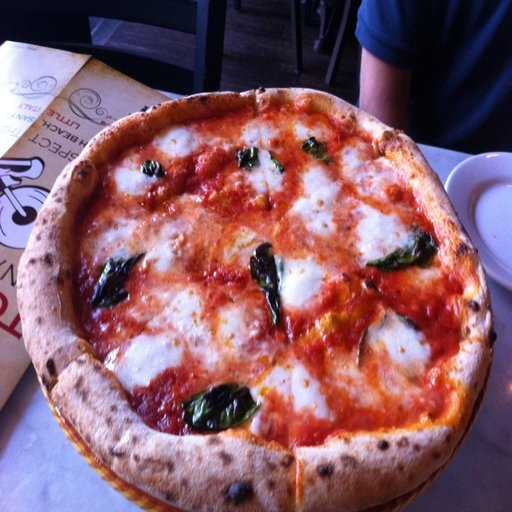

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

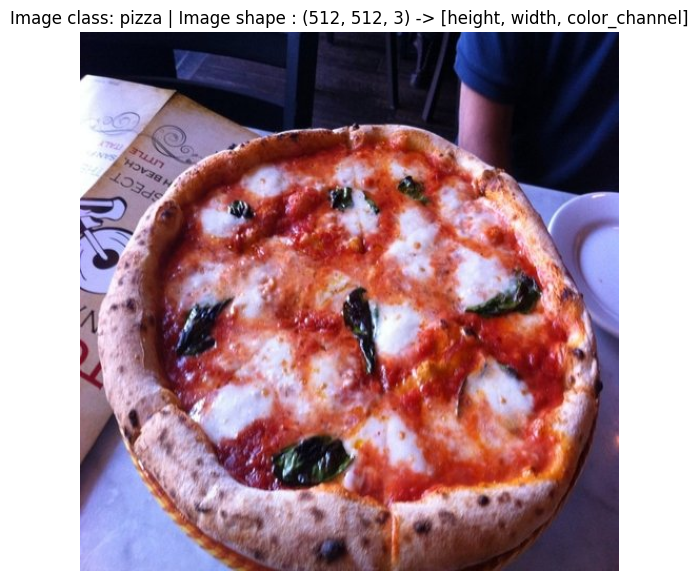

In [ ]:
# Try to visualize and image with mathplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Converting images as array
img_as_array = np.asarray(img)

# plot the images with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape : {img_as_array.shape} -> [height, width, color_channel]")
plt.axis(False)

array([[[  9,   6,  25],
        [  9,   6,  25],
        [  9,   8,  26],
        ...,
        [ 18,  25,  71],
        [ 16,  21,  63],
        [ 13,  16,  57]],

       [[ 12,   9,  28],
        [ 12,   9,  28],
        [ 11,  10,  28],
        ...,
        [ 18,  25,  69],
        [ 16,  19,  60],
        [ 12,  16,  54]],

       [[ 13,  10,  29],
        [ 13,  10,  29],
        [ 12,  11,  29],
        ...,
        [ 16,  23,  65],
        [ 13,  17,  54],
        [ 10,  13,  48]],

       ...,

       [[177, 176, 244],
        [177, 176, 244],
        [173, 172, 240],
        ...,
        [ 58,  39,  59],
        [ 60,  38,  59],
        [ 60,  38,  59]],

       [[176, 177, 244],
        [175, 176, 243],
        [171, 170, 238],
        ...,
        [ 59,  40,  60],
        [ 61,  39,  60],
        [ 60,  38,  59]],

       [[173, 174, 241],
        [173, 174, 241],
        [171, 170, 238],
        ...,
        [ 58,  39,  59],
        [ 61,  39,  60],
        [ 60,  38,  59]]], dtype=uint8)
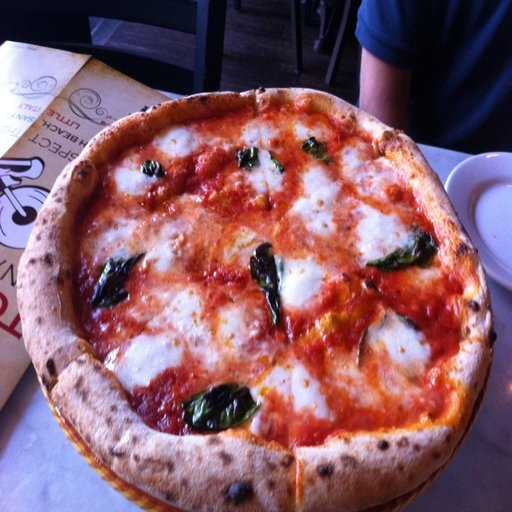

In [ ]:
img_as_array


# 3. Tranfoirming Data

Before we can use our image data wit Pytorch:
1. Turn your target data into tensor(in our case, numerical representation of images)
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.Dataloader`, we'll call these `Dataset` and `DataLoader`

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


# 3.1 Tranforming data with torchvision.transforms

Tranform help you get your images ready to be used with a model/perform data argumentation

In [ ]:
# Write a transform for image
data_transform =  transforms.Compose([
    # Resize images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [ ]:
print(f" shape of the data: {data_transform(img).shape}")
data_transform(img)

 shape of the data: torch.Size([3, 64, 64])


tensor([[[0.0549, 0.0510, 0.0235,  ..., 0.0353, 0.0392, 0.0431],
         [0.0392, 0.0667, 0.0314,  ..., 0.0235, 0.0275, 0.0353],
         [0.0314, 0.0471, 0.0588,  ..., 0.0235, 0.0314, 0.0392],
         ...,
         [0.2275, 0.2314, 0.2392,  ..., 0.6902, 0.6902, 0.6824],
         [0.2392, 0.2392, 0.2431,  ..., 0.6863, 0.7059, 0.6980],
         [0.2314, 0.2392, 0.2510,  ..., 0.6980, 0.7098, 0.6941]],

        [[0.0902, 0.0863, 0.0353,  ..., 0.0392, 0.0431, 0.0392],
         [0.0588, 0.1059, 0.0549,  ..., 0.0314, 0.0314, 0.0314],
         [0.0353, 0.0824, 0.1020,  ..., 0.0314, 0.0353, 0.0353],
         ...,
         [0.1686, 0.1725, 0.1804,  ..., 0.7176, 0.7059, 0.6824],
         [0.1647, 0.1725, 0.1843,  ..., 0.7098, 0.7098, 0.6902],
         [0.1608, 0.1725, 0.1843,  ..., 0.7098, 0.7098, 0.6863]],

        [[0.2706, 0.2588, 0.1020,  ..., 0.1059, 0.1098, 0.1098],
         [0.1686, 0.3098, 0.1765,  ..., 0.0980, 0.1020, 0.1020],
         [0.0980, 0.2510, 0.2980,  ..., 0.0941, 0.0980, 0.

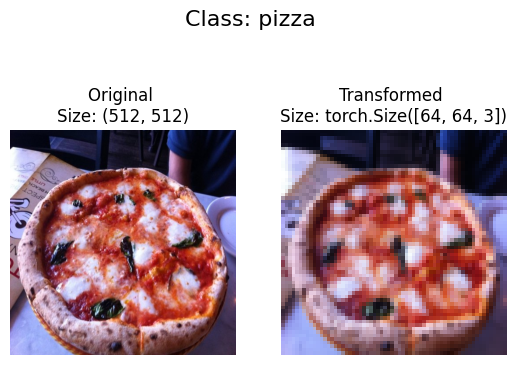

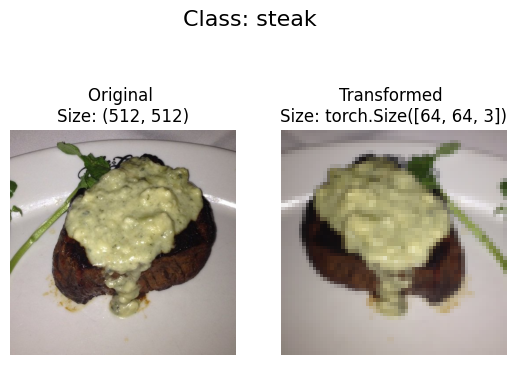

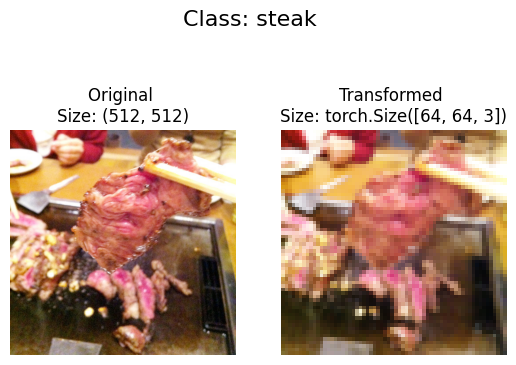

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

#4) Option 1: Loading image data using ImageFolder

We can load image classification data using `torchvision.datasets.ImageFolder`


In [ ]:

  # Use ImageFolder to create datasets(s)

from torchvision import datasets
from torch.utils.data import DataLoader
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # Transform the data
                                  target_transform=None) #transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data




(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class name as list
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [ ]:
# Get class name as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image shape: {img.shape}")
print(f"Label: {label}")
print(f"Datatype:  {img.dtype}")
print(f"Class: {class_name[label]}")

Image shape: torch.Size([3, 64, 64])
Label: 0
Datatype:  torch.float32
Class: pizza


Text(0.5, 1.0, 'Class: pizza')

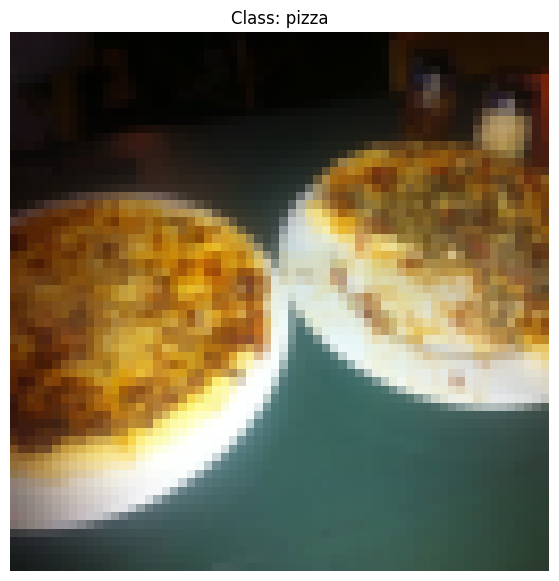

In [ ]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)
img_permute.shape

# Plot the images
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"Image shape: {img.shape}")
plt.axis("off")
plt.title(f"Class: {class_name[label]}")

## 4.1 Turn loaded images into `DataLoades's`

 A `DataLoader` is going to help us turn our `Dataset`'s into iterables and we can custom a batch size images at a time



In [ ]:
# Turn train and test datasets into Dataloader's

from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                num_workers=os.cpu_count(),
                                shuffle=True) # shuffle the data
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=False) # don't shuffle the data
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7acc693b7b10>,
 <torch.utils.data.dataloader.DataLoader at 0x7acc69681050>)

In [ ]:
len(train_dataloader), len(test_dataloader)


(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))
img.shape, label.shape

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channel, height, weight]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channel, height, weight]
Label shape: torch.Size([1])


## 5. Option 2: Loading image data with a custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

Pros:
* Can create a `Dataset` out of almost anything
* Not limite to PyTorch pre-built `Dataset` FunctionSchema

Cons:
* Even though you could create `Dataset` out of almost anything, it doesn't mean it will work...
* Using a custom `Dataset` often result in us writing more code, which could be prone to errors and performance issues


In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [ ]:
# Instance of torchvision.datsets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class name using `os.scandir()` to traverse a target directory(ideally the directory is in standard images classification format)
2. Raise an error if the class names aren't found( if this happens, there might be something wrong with the directory structure)
3. Turn the class name into a dict and a list and return ThreadedCompleter


In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f" Target dir: {target_directory}")

# Get the class names from the target directory
class_name_found = sorted([entry.name for entry in list(os.scandir(target_directory)) if entry.is_dir()])
class_name_found


 Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ Find the class folder names in a target directory """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory} directory... Please check file strucutre")
  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

 ### 5.2 Create a custom `Dataset` to repicate `ImageFolder`

 To create our own datasets, we want to:

 1. Subclass `torch.utils.data.Dataset`
 2. Init our subclass with a target directory ( the directory we'd like to get data from) as well as a transform if we'd like to transform our data.transforms
 3. Crate several attribute:
    * paths - path for our images
    * transform - the transform we'd like to use
    * classes - a list of target classes
    * class_to_idx - a dict of the taget classes mapped to target labels
 4. Create a function to `load_images()`, this function will open an image
 5. Overwrite `__len()__` method to return the length of our dataset
 6. Overwite `__getitem()__` method to return a given sampe when passed an index
                                        

In [ ]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset
import pathlib
import os
from PIL import Image
import torch
from typing import Tuple, Dict, List
from torchvision import transforms

# Assuming find_classes function is defined elsewhere and works correctly
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ Find the class folder names in a target directory """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory} directory... Please check file strucutre")
  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx


# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self, targ_dir: str, transforms=None):

    # 3. Create classes attribue

    # Get all of the image paths by calling glob on the pathlib.Path object
    # The result is a generator, convert it directly to a list
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # Corrected line
    # Setup transforms attribute for later use
    self.transforms = transforms
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)
    # Setup transforms
    self.transform = transforms # This seems to be a duplicate of self.transforms
    # Create classes and class_to_idx attribute
    self.classes, self.class_to_idx = find_classes(targ_dir) # This seems to be a duplicate

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Override __len()__
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Override __getitem()__ to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label(X, y) pair"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    # Use self.transforms, as self.transform is a duplicate
    if self.transforms:
      return self.transforms(img), class_idx # return data, label (X,y)
    else:
      return img, class_idx # return untransform img and label

In [ ]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
# 06/08/2025 Checkin for errors

# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(train_dir, transforms=train_transforms)
test_data_custom = ImageFolderCustom(test_dir, transforms=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7acd4645a6d0>,
 <__main__.ImageFolderCustom at 0x7acc6955f350>)

In [ ]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustomeDataset

print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Create a funciton to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize
2. To prent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib(MWC)

In [ ]:
# 1. Create a funciton to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust the display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposed, n shouldn't larger than 10, setting to 10 and removing shape display")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6.Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] ->[height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = (f"Class: {classes[targ_label]}")
      if display_shape:
        title = title + f"\nShape: {targ_image_adjust.shape}"
    plt.title(title)



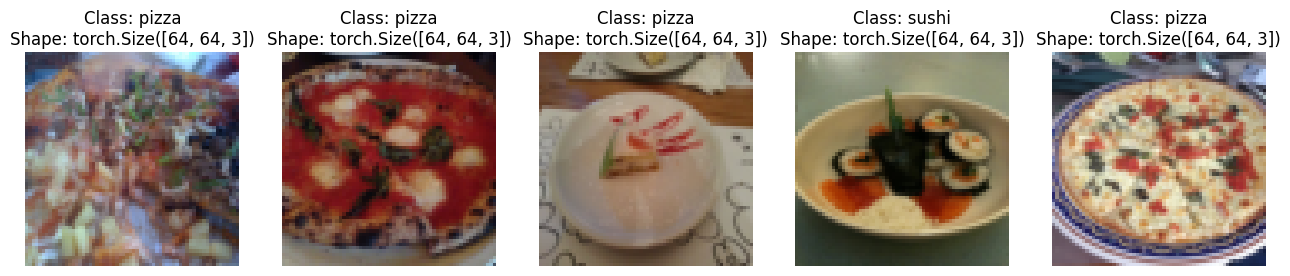

In [ ]:
# Display random images from ImageFolder create Dataset
display_random_images(train_data,
                     n=5,
                     classes=class_name,
                     seed=None)

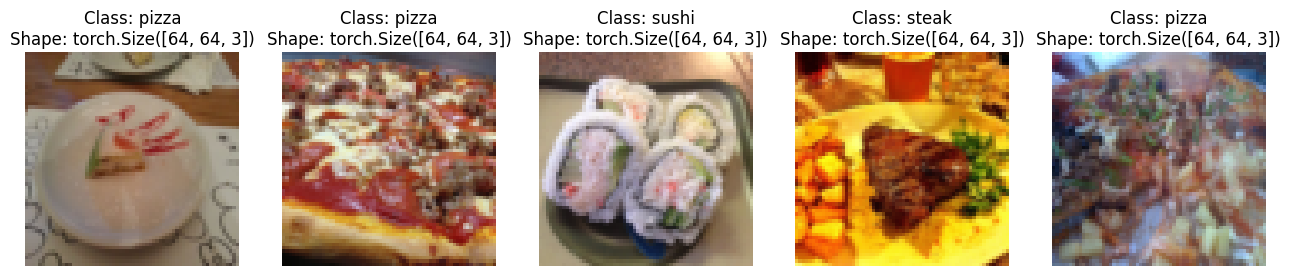

In [ ]:
# Display random images from our ImageFolderCustom Dataset

display_random_images(train_data_custom,
                     n=5,
                     classes=class_name,
                     seed=None)

### 5.4 Turn custom loaded images into `DataLoader`'s


In [ ]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=os.cpu_count(),
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7acc68543350>,
 <torch.utils.data.dataloader.DataLoader at 0x7acc68a1d690>)

In [ ]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 6. Other forms of transforms (data augmentation)

Data augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this mean applying various image transformation to the trianing mpimg.image

Let's take a look at one particular type of augmentation used to train PyTorch visions models to state of the art

In [ ]:
# Let's look at trivailaugment

from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor()])

In [ ]:
# Get all the image path

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:5]

[PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1302563.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg')]

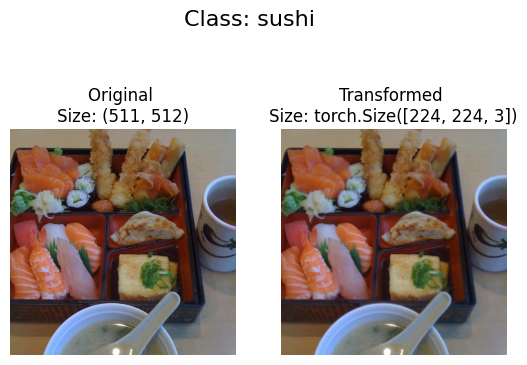

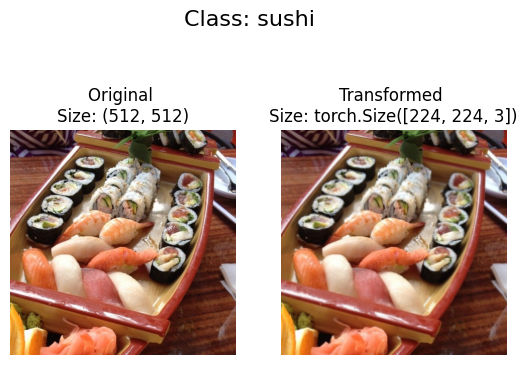

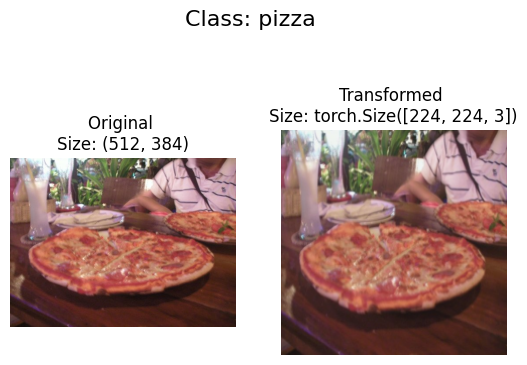

In [ ]:
# PLot random transformed images
plot_transformed_images(image_path_list,
                        transform=train_transforms,
                        n=3,
                        seed = None)

# 7. Model 0: TinyVGG without data augmentation

Let's replicate TinyVGG arhitecture from the CNN expaliner website



# 7.1 Creating transform and loading for Model 0


In [ ]:
# Create simple transform
simple_transform = transforms.Compose([transforms.Resize(size=(64, 64)),
                                       transforms.ToTensor()])



In [ ]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7acc68a79710>,
 <torch.utils.data.dataloader.DataLoader at 0x7acc687e9d10>)

### 7.2 Create TinyVGG model class

In [ ]:
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )
  def forward(self, x :torch.Tensor):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x


In [ ]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_name)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a singel image( to test the model)

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(img_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### 7.4 Use `torch.info` to get an idea of the shape going through model

In [ ]:
# Download torch info or check if torch info torhc info have bene install

try:
  import torchinfo
  print("The module is not install. Please install the model.")
except:
  print("Downloading model: ")
  !pip install torchinfo
  import torchinfo

In [ ]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create a train and test loop funcitons

* `train_step()` - takes in a model and dataloader and trains the model on the dataloader.
* `test_step()` - takesin a model and dataloder and evaluate the model on

In [ ]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # Put model into train mode
  model.train()

  # Setup loss and train accurarcy values
  train_loss, train_acc = 0, 0

  # Loop through the data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Caculated the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # 6. Caculated accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metric to get average loss and accurarcy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  # Put the model into eval mode
  model.eval()

  # Setup test loss and test accuracy values

  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through the dataloader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Caculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # 3. Caculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get avg loss and acc per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### 7.6 Creating a `train()` funciton to combine `test_step()`

In [ ]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloader + loss funciton

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []
             }

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    # 4. print out what is happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled rseults at the end of epoch
  return results

### 7.7 Train and evaluated model 0

In [ ]:
# set the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Re-create an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,# numbere of color channel
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} second")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1063 | Train acc: 0.3047 | Test loss: 1.0983 | Test acc: 0.3011
Epoch: 1 | Train loss: 1.0998 | Train acc: 0.3281 | Test loss: 1.0697 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.0869 | Train acc: 0.4883 | Test loss: 1.0808 | Test acc: 0.4924
Epoch: 3 | Train loss: 1.0844 | Train acc: 0.3984 | Test loss: 1.0607 | Test acc: 0.5833
Epoch: 4 | Train loss: 1.0662 | Train acc: 0.4219 | Test loss: 1.0656 | Test acc: 0.5644
Total training time: 7.867 second


In [ ]:
model_0_results

{'train_loss': [1.1063192337751389,
  1.0998038053512573,
  1.0868677198886871,
  1.0844071209430695,
  1.0662295073270798],
 'train_acc': [0.3046875, 0.328125, 0.48828125, 0.3984375, 0.421875],
 'test_loss': [1.0983227094014485,
  1.0696964263916016,
  1.08078138033549,
  1.0606969197591145,
  1.0655550956726074],
 'test_acc': [0.30113636363636365,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5643939393939394]}

### 7.8 Plot the loss curves of Model 0

A ***loss_curve*** is a way of tracking your model's progress over time

A guide for differnt loss curve can be found: https://developers.google.com/machine-learning/crash-course/overfitting/interpreting-loss-curves



In [ ]:
# Get the model_0_results key
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""

  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()




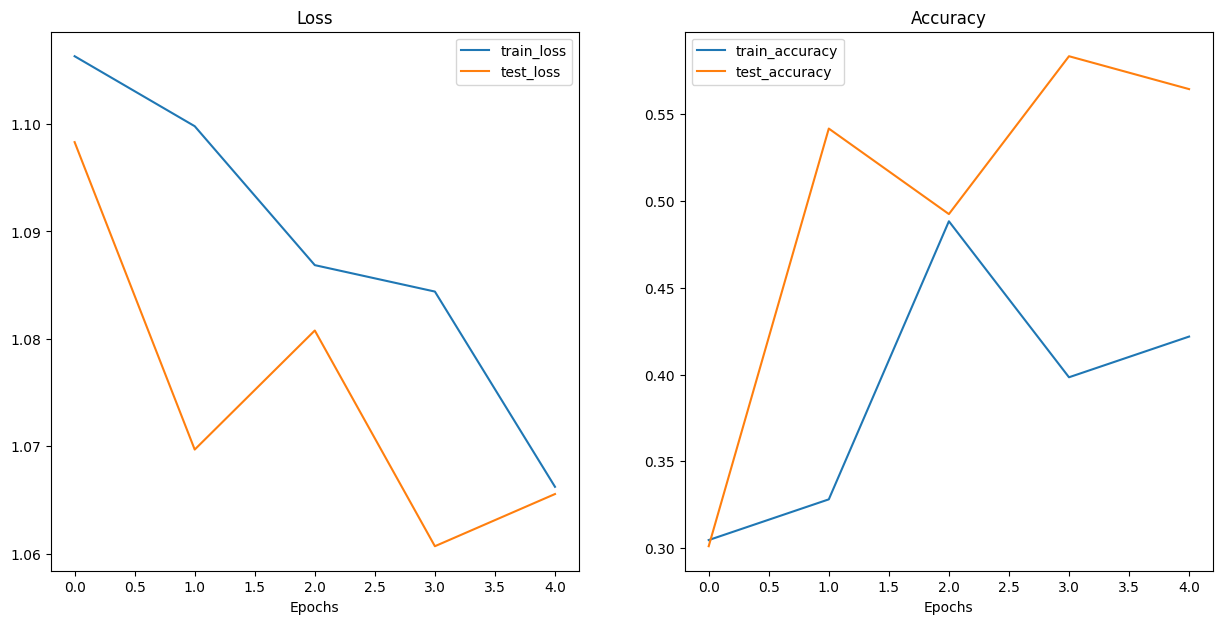

In [ ]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

A loss curve is one of the most helpful way to troubleshoot a model.

---

* **Underfitting**: It happend when the model loss function performing too poorly because of serveral issue like:
    * The pattern of data is too simple
    * Having too few features to train
    * Not long enough time to train

**The consequences of underfitting results in poor performance and in accuracy prediction for the model**

* **Method to dealing with underfitting**

  1. Add more layers/units to your model: Increase model ability to learn
  2. Changing the learning rate: Update the learning rate either lower or increase it
  3. Train for longer: Models need more time to learn resprenstive data.
  4. Use transfer learning: Take a pre-learned model from one problem and applied it to our model
  5. Use less regularization: Maybe models prevent overfitting too much making the model underfitting.

---
* **Overfitting**: It happend when the model when the gap between train model and test model are too big, thera re several reasons why:
  * The complexity making the models training data is noisy
  * Training for too long
  * Contains unirrelivant or missing pieces of data needed
  * The models train too well on one part

**The consequences of overfitting results in poor generlization, meaning it will perform poor with new data**

* **Method to deal with overfitting**
  1. Get more data: Give our model more chance to learn patterns between samples
  2. Data augmentation: Increase diversity of your training dataset without collecting more data. ex. rotate images, blur images, ...
  3. Better data: Enhances model datasets
  4. Use transfer learning: Take a pre-learned model from one problem and applied it to our model
  5. Simplify models: Reduce layers it uses to reduce the number of hidden units of each layers
  6. Learning rate decay: The idea is to slowly decrease the learning rate as model train.
  7. Use early stopping: At one point of the model, early stopping will stop the models "before" it begin to overfit.

---
* Just right: model test and train are as close as they can

## 9. Model 1: TinyVGG with data augmentation

Now let's try another modelling experiement, this time using the same model as before with some data augmentation

### 9.1 Create transform with data augmentation

In [ ]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_transforms_trivial = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create test transform

test_transforms_compose = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


### 9.2 Create train and test `dataset` and `dataloader` with data augmentation

In [ ]:
# Turn images folder into Dataset
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transforms_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transforms_compose)

In [ ]:
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
torch.manual_seed(42)

# Create DataLoader's
train_dataloader_augmented = DataLoader(train_data_augmented,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,
                                   num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7acc6884de90>,
 <torch.utils.data.dataloader.DataLoader at 0x7acc696a75d0>)

### 9.3 Construct and train model 1

This time we'll be using the same model architecture except this time we'll train it with the augmented data.



In [ ]:
# Create model 1 and sent it to target device

torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# Set randome seed

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 5

# Setup loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time for model_1: {end_time-start_time:.3f} second")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1049 | Train acc: 0.2500 | Test loss: 1.1019 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0807 | Train acc: 0.4258 | Test loss: 1.1261 | Test acc: 0.2604
Epoch: 2 | Train loss: 1.0712 | Train acc: 0.4258 | Test loss: 1.1592 | Test acc: 0.2604
Epoch: 3 | Train loss: 1.1254 | Train acc: 0.3047 | Test loss: 1.1581 | Test acc: 0.2604
Epoch: 4 | Train loss: 1.0859 | Train acc: 0.4258 | Test loss: 1.1551 | Test acc: 0.3333
Total training time for model_1: 6.209 second


### 9.4 Plot loss curve for model 1

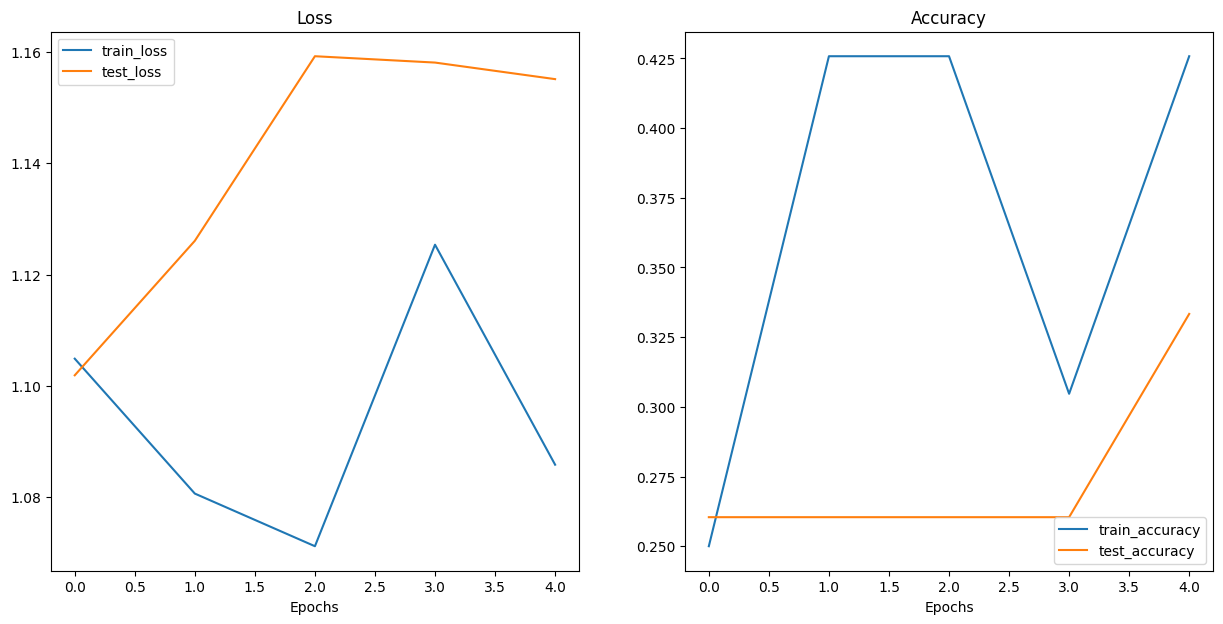

In [ ]:
# Plotting a loss curve for model_1
plot_loss_curves(model_1_results)


## 10. Compare model results

After evaluating our modelling experiemtn on their own, it's important  to compare them to each other

Ther are a few different key  ways to do this:
1. Hard coding ( What are we doing)
2. W Pytorch + Tensorboard
3. Weight + Bias
4. MLFlow

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.106319   0.304688   1.098323  0.301136
1    1.099804   0.328125   1.069696  0.541667
2    1.086868   0.488281   1.080781  0.492424
3    1.084407   0.398438   1.060697  0.583333
4    1.066230   0.421875   1.065555  0.564394

In [ ]:
model_1_df

train_loss  train_acc  test_loss  test_acc
0    1.104914   0.250000   1.101927  0.260417
1    1.080679   0.425781   1.126088  0.260417
2    1.071224   0.425781   1.159246  0.260417
3    1.125388   0.304688   1.158106  0.260417
4    1.085869   0.425781   1.155131  0.333333

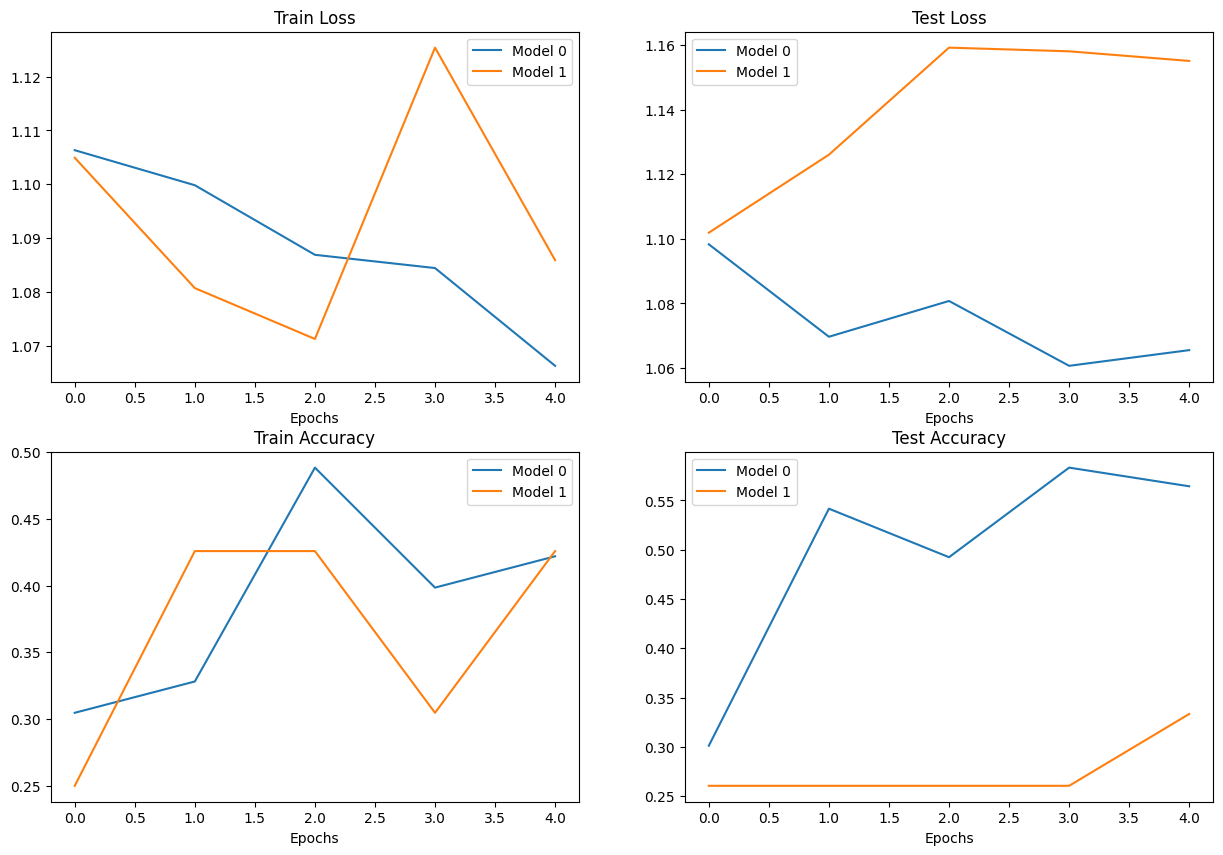

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

We see that both model 0 and model 1 perform quite poorly, if we ever built model 2, we can do the following to improved:
1. Train for longer
2. Improve epochs
3. Increase hidden units
---

# 11. Make prediction on a custom images

What we have done before is a already progress datasets, but if we ever want to make a prediction on our custom datasets then how can we do it?



In this case, we already train model to predict pizza, sushi and steak so let's utilized it and predict on our own images.

To do so we:
1. Load an image
2. Pre-process in a way that match the type of data on our model

In another words, we have to transform own custom images into tensor and make sure the tensors is the right datatype before passing to our model.

In [ ]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

### 11.1 Loading custom image with Pytorch

We'll use `torchvision.io.read_image()` method. This method will read a JPEG or PNG images and turn it into 3 dimensional RGB or grayscale `torch.Tensior`. The value of datatype is `unit8` in range `[0, 255]`

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

Our `custom_image` tensor is datatype of `torch.unit8` and its values between `[0,255]`.

But our model take images tensor datatype of `torch.float32` and values between `[0, 1]`



*So we have to convert it into the same format as our model is trained on, if not it will error.*




In [ ]:
# # Try to make a prediction on image in uint8 format (this will error)
# model_1.eval()
# with torch.inference_mode():
#     model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
# Turn the custom images datatype into `float_32` with `torch.float32`

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get between [0, 1]
custom_image = custom_image / 255

# Print out custom image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")


Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

## 11.2 Predicting on custom images with a train model

The shape of our custom image are [3, 4032, 3024] and we need to to transform it into our model shape [3, 64, 64]

* One way to do it is use `torchvision.transforms.Resize()`

* Make sure the images look ok and we have to use permute the dimensions from to to suit;s requirements `matplotlib (color height weight) -> (height weight color) matplotlib`

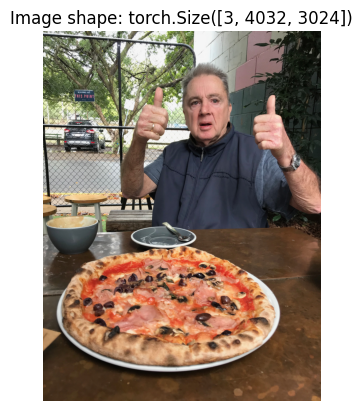

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
 # Create a trnasofmr pipleine to resize image
 custom_image_transform = transforms.Compose([transforms.Resize((64, 64))])

 # Transform the custom image
 custom_image_transformed = custom_image_transform(custom_image)

 # Print out original shape and new shape
 print(f"Custom image shape before transform: {custom_image.shape}")
 print(f"Custom image shape after transform: {custom_image_transformed.shape}")

Custom image shape before transform: torch.Size([3, 4032, 3024])
Custom image shape after transform: torch.Size([3, 64, 64])


### Not only we have to worry about the size but we also have to worry about the devices

In [ ]:
# model_1.eval()
# with torch.inference_mode():
#     custom_image_pred = model_1(custom_image_transformed)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper_CUDA___slow_conv2d_forward)

# NOTE: TOP 3 things that are most common errors in machine learning:
1. Not matching datatype
2. Not maching devices
3. Not matching dimensions/shape

In [ ]:
# Check the model's data type
print(f"Model datatype: {next(model_1.parameters()).dtype}")

# Check the model's device
print(f"Model device: {next(model_1.parameters()).device}")

# Check the shape of the model
print(f"Model shape: {next(model_1.parameters()).shape}")

# You can also check the shape of the entire model's parameters (though this might be large)
# print(f"Shape of all model parameters: {model_1.parameters()}")

Model datatype: torch.float32
Model device: cuda:0
Model shape: torch.Size([10, 3, 3, 3])


In [ ]:
# Check the custom image data type
print(f"Custom image datatype: {custom_image_transformed.dtype}")

# Check the custom image device
print(f"Custom image device: {custom_image_transformed.device}")

# Check the custome image shape
print(f"Custom image shape: {custom_image_transformed.shape}")

Custom image datatype: torch.float32
Custom image device: cpu
Custom image shape: torch.Size([3, 64, 64])


In [ ]:
model_1.eval()
with torch.inference_mode():
  # Make a prediction image with an extra dimensions
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

In [ ]:
custom_image_pred

tensor([[ 0.0792,  0.0364, -0.2081]], device='cuda:0')

In [ ]:
# Now, convert from logits -> prediction probabilities -> prediction labels
# Print out prediction logits
print(f"Prediction logits:\n{custom_image_pred}\n")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_prob = custom_image_pred.softmax(dim=1)
print(f"Prediction probabilities:\n{custom_image_pred_prob}\n")

# Convert predction probabilities > prediction labels using torch.argmax()
custom_image_pred_label = torch.argmax(custom_image_pred_prob, dim=1)
print(f"Prediction label:\n{custom_image_pred_label}")


Prediction logits:
tensor([[ 0.0792,  0.0364, -0.2081]], device='cuda:0')

Prediction probabilities:
tensor([[0.3692, 0.3538, 0.2770]], device='cuda:0')

Prediction label:
tensor([0], device='cuda:0')


In [ ]:
# Convert prediction label from tensor form to string(numbers to text)

# Find the predicted label
custom_image_pred_class = class_name[custom_image_pred_label.cpu()]
print(f"Custom image model prediction: {custom_image_pred_class}")

Custom image model prediction: pizza


In [ ]:
# Check the values prediction probabilites
custom_image_pred_prob

tensor([[0.3692, 0.3538, 0.2770]], device='cuda:0')

### Although the model predict right , but we see that all three values are quite close to each other so that mean couples of things:
1. The model try to predict all three classes at the same time
2. The model's prob just guessing by assigning similar values to each of the class

---

## 11.3 Putting custom images prediction together to build a function

1. Takes in a target image path and converts to the right datatype for our model (torch.float32).
2. Makes sure the target image pixel values are in the range [0, 1].
3. Transforms the target image if necessary.
4. Makes sure the model is on the target device.
5. Makes a prediction on the target image with a trained model (ensuring the image is the right size and on the same device as the model).
6. Converts the model's output logits to prediction probabilities.
7. Converts the prediction probabilities to prediction labels.
8. Plots the target image alongside the model prediction and prediction probability.

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_name: List[str] = None,
                        transforms=None,
                        device: torch.device = device):
    """
    Make a prediction on a target image with a trained model and plot the image with the prediction
    """
    # 1. Takes in a target image path and converts to the right datatype for our model (torch.float32)
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Makes sure the target image pixel values are in the range [0, 1].
    # Check if the maximum value is greater than 1.0 (assuming the minimum is 0)
    if target_image.max() > 1.0:
        target_image = target_image / 255.

    # 3. Transforms the target image if necessary.
    if transforms:
        target_image = transforms(target_image)

    # 4. Makes sure the model is on the target device.
    model.to(device)

    # 5. Makes a prediction on the target image with a trained model (ensuring the image is the right size and on the same device as the model).
    # Add a batch dimension and move to the target device
    target_image = target_image.unsqueeze(dim=0).to(device)

    model.eval()
    with torch.inference_mode():
        custom_image_pred_logits = model(target_image)

    # 6. Converts the model's output logits to prediction probabilities.
    custom_image_pred_prob = torch.softmax(custom_image_pred_logits, dim=1)

    # 7. Converts the prediction probabilities to prediction labels.
    custom_image_pred_label = torch.argmax(custom_image_pred_prob, dim=1)

    # 8. Plots the target image alongside the model prediction and prediction probability.
    plt.figure()
    plt.imshow(target_image.squeeze().permute(1, 2, 0).cpu()) # permute image dimensions to HWC and move to CPU to plot
    if class_name:
        title = f"Pred: {class_name[custom_image_pred_label.cpu()]} | Prob: {custom_image_pred_prob.max().cpu():.3f}"
    else:
        title = f"Pred: {custom_image_pred_label.cpu()} | Prob: {custom_image_pred_prob.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

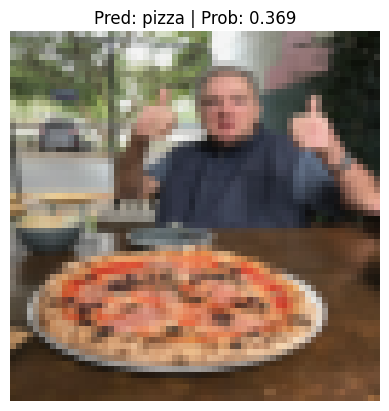

In [ ]:
# Pred on custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_name=class_name,
                    transforms=custom_image_transform,
                    device=device)